# MAP2220 - Fundamentos de Análise Numérica
## 2º Semestre de 2020 - Prof. Nelson Kuhl
## Exercícios da lista sobre o MMQ

In [1]:
using LinearAlgebra, Plots # Serão usados nos exercícios

### Exercício 3 (b) modificado
Queremos aproximar $f(x) = \text{sen}\,x$ por $g(x) = a + bx + cx^2$ de forma a minimizar o erro quadrático (ao quadrado)
$EQ^2(f,g) = \int_{-\pi}^{\pi} [f(x) - g(x)]^2\,dx$. Podemos considerar o espaço vetorial $V$ como o espaço das funções
contínuas em $[-\pi,\pi]$, e o subespaço $G$ como o espaço gerado pelas funções
$$
g_0(x) = 1,\quad g_1(x) = x,\quad g_2(x) = x^2,
$$
que é o espaço dos polinômios de grau menor ou igual a 2. Observemos que o erro quadrático está associado ao produto interno
$$
\langle u, v\rangle = \int_{-\pi}^{\pi} u(x)v(x)\,dx,\quad \text{pois}\quad EQ^2(f,g) = \langle f-g, f-g\rangle .
$$
A matriz do sistema normal é obtida pelos cálculos
\begin{align*}
\langle g_0, g_0\rangle &= \int_{-\pi}^{\pi} g_0(x)^2\,dx = \int_{-\pi}^\pi dx = 2\pi, \\
\langle g_0, g_1\rangle &= \int_{-\pi}^{\pi} g_0(x)g_1(x)\,dx = \int_{-\pi}^{\pi} x\,dx = 0 = \langle g_1, g_0\rangle, \\
\langle g_0, g_2\rangle &= \int_{-\pi}^{\pi} g_0(x)g_2(x)\,dx = \int_{-\pi}^{\pi} x^2\,dx =
    \left.\frac{x^3}{3}\right\vert_{-\pi}^{\pi} = \frac{2\pi^3}{3} = \langle g_2, g_0\rangle, \\
\langle g_1, g_1\rangle &= \int_{-\pi}^{\pi} g_1(x)^2\,dx = \int_{-\pi}^{\pi} x^2\,dx = \frac{2\pi^3}{3}, \\
\langle g_1, g_2\rangle &= \int_{-\pi}^{\pi} g_1(x)g_2(x)\,dx = \int_{-\pi}^{\pi} x^3\,dx = 0 = \langle g_2, g_1\rangle, \\
\langle g_2, g_2\rangle &= \int_{-\pi}^{\pi} g_2(x)^2\,dx = \int_{-\pi}^{\pi} x^4\,dx =
    \left.\frac{x^5}{5}\right\vert_{-\pi}^{\pi} = \frac{2\pi^5}{5},
\end{align*}
e o lado direito do sistema normal é obtido por
\begin{align*}
\langle g_0, f\rangle &= \int_{-\pi}^{\pi} \text{sen}\,x\,dx = 0, \\
\langle g_1, f\rangle &= \int_{-\pi}^{\pi} x\,\text{sen}\,x\,dx = 2\int_0^{\pi} x\,\text{sen}\,x\,dx =
    \text{ (integração por partes) } \\
    \phantom{\langle g_1, f\rangle} &= 2\left[\left.-x\cos x\right\vert_0^{\pi} + \int_0^{\pi} \cos x\,dx\right] = 2\pi, \\
\langle g_2, f\rangle &= \int_{-\pi}^{\pi} x^2\,\text{sen}\,x\,dx = 0.
\end{align*}

Logo, o sistema normal para $a$, $b$ e $c$ é
$$
\left(\begin{array}{ccc}
    2\pi & 0 & \frac{2\pi^3}{3} \\
    0 & \frac{2\pi^3}{3} & 0 \\
    \frac{2\pi^3}{3} & 0 & \frac{2\pi^5}{5}
\end{array}\right)
\left(\begin{array}{c} a \\ b \\ c \end{array}\right) =
\left(\begin{array}{c} 0 \\ 2\pi \\ 0 \end{array}\right)
$$
cuja solução é $a=0$, $b=\frac{3}{\pi^2}$ e $c=0$. A aproximação é
$$
g(x) = \frac{3}{\pi^2}x .
$$

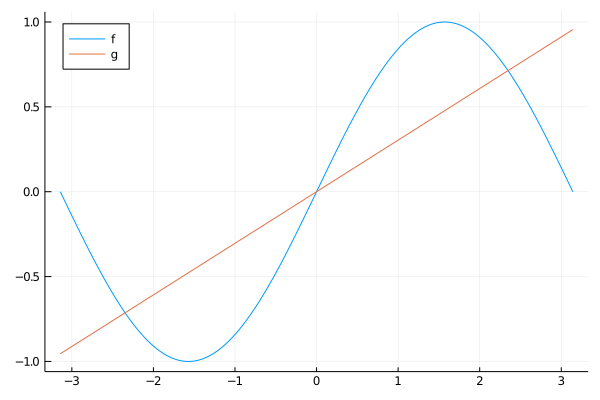

In [2]:
# Gráfico da função e da aproximação
g(x) = 3*x/(pi^2)
x = collect(-pi:0.001:pi)
plot(x, sin.(x), label="f", legend = :topleft)
plot!(x, g.(x), label="g")

O erro quadrático é igual a
$$
EQ(f,g) = \sqrt{\langle f-g, f-g\rangle} = \sqrt{\int_{-\pi}^{\pi} \left(\text{sen}\,x - \frac{3}{\pi^2}x\right)^2\,dx} =
    \sqrt{\pi - \frac{12}{\pi} + \frac{6}{\pi}} \approx 1.10983 \  \text{ (exercício)}.
$$
Para **qualquer outro polinômio de grau menor ou igual a 2**, o erro quadrático será **maior**.

### Exercício 7
Temos a tabela
$$
    \begin{array}{c|cccccc}
        t_i & 1 & 2 & 3 & 4 & 5 & 6 \\
        \hline
        R_i & 21.3 & 21.8 & 21.2 & 21.3 & 20.5 & 21.0
    \end{array}
$$
e queremos ajustá-la por uma reta $\bar{R}(t) = \alpha + \beta t$ usando o MMQ, onde agora o produto interno envolve os pesos
$\lambda$
$$
    \begin{array}{c|cccccc}
        i & 1 & 2 & 3 & 4 & 5 & 6 \\
        \hline
        \lambda_i & 0.5 & 0.6 & 0.7 & 0.8 & 0.9 & 1.0
    \end{array} .
$$
Temos então:
$$
    \text{produto interno: } \langle u, v\rangle = \sum_{i=1}^6 \lambda_iu(t_i)v(t_i), \quad
    \text{erro quadrático: } \|u - v\| = \sqrt{\langle u-v, u-v\rangle} = \sqrt{\sum_{i=1}^6\lambda_i[u(t_i)-v(t_i)]^2}
$$
e $g_0(t) = 1$, $g_1(t) = t$. O sistema normal é obtido das expressões
\begin{align*}
    \langle g_0, g_0\rangle &= \sum_{i=1}^6 \lambda_ig_0(t_i)^2 = \sum_{i=1}^6 \lambda_i, \\
    \langle g_0, g_1\rangle &= \sum_{i=1}^6 \lambda_ig_0(t_i)g_1(t_i) = \sum_{i=1}^6 \lambda_it_i = \langle g_1, g_0\rangle, \\
    \langle g_1, g_1\rangle &= \sum_{i=1}^6 \lambda_ig_1(t_i)^2 = \sum_{i=1}^6 \lambda_it_i^2, \\
    \langle g_0, R\rangle &= \sum_{i=1}^6 \lambda_ig_0(t_i)R(t_i) = \sum_{i=1}^6 \lambda_iR_i, \\
    \langle g_1, R\rangle &= \sum_{i=1}^6 \lambda_ig_1(t_i)R(t_i) = \sum_{i=1}^6 \lambda_it_iR_i,
\end{align*}
que serão calculadas a seguir.

In [3]:
# Dados do problema
t = collect(1:6)
R = [21.3; 21.8; 21.2; 21.3; 20.5; 21.0]
λ = collect(0.5:0.1:1.0);
[t'; R'; λ']

3×6 Array{Float64,2}:
  1.0   2.0   3.0   4.0   5.0   6.0
 21.3  21.8  21.2  21.3  20.5  21.0
  0.5   0.6   0.7   0.8   0.9   1.0

In [4]:
# Matriz do sistema normal
A = zeros(2,2) # criando espaço
A[1,1] = sum(λ); A[1,2] = sum(λ.*t); A[2,1] = A[1, 2]; A[2, 2] = sum(λ.*(t.^2))
A

2×2 Array{Float64,2}:
  4.5  17.5
 17.5  80.5

In [5]:
# Lado direito do sistema normal
b = zeros(2) # criando espaço
b[1] = sum(λ.*R); b[2] = sum(λ.*t.*R)
b

2-element Array{Float64,1}:
  95.06
 367.74

Logo, o sistema normal é
$$
    \left(\begin{array}{rr}
        4.5 & 17.5 \\
        17.5 & 80.5
    \end{array}\right)
    \left(\begin{array}{c} \alpha \\ \beta \end{array}\right) =
    \left(\begin{array}{r} 95.06 \\ 367.74 \end{array}\right),
$$
cuja solução é dada por

In [6]:
a = A\b

2-element Array{Float64,1}:
 21.73000000000002
 -0.15571428571429016

A volatilidade é o erro quadrático ao quadrado, ou seja
$$
    \sigma^2 = \langle R - \bar{R}, R - \bar{R}\rangle = \sum_{i=1}^6 \lambda_i[R_i - \bar{R}(t_i)]^2,
$$
cujo valor calcularemos abaixo.

In [7]:
g(s) = a[1] + a[2]*s # reta que ajusta a tabela
σ2 = sum(λ.*((R - g.(t)).^2))

0.38257142857143145

In [8]:
# Erro quadrático
σ = sqrt(σ2)

0.6185235877243741

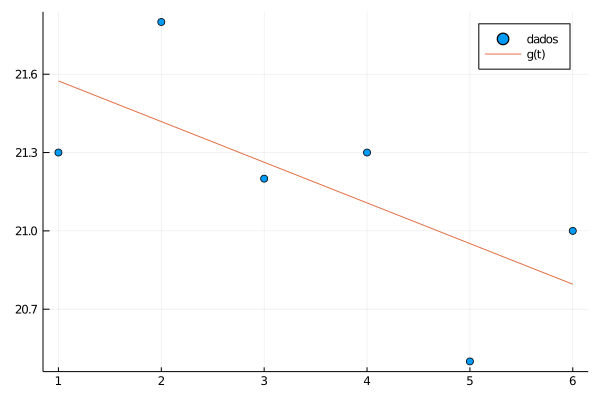

In [9]:
# Vejamos o gráfico da tabela juntamente com a aproximação
scatter(t, R, label = "dados")
tt = collect(1:0.001:6)
plot!(tt, g.(tt), label = "g(t)")